Student name: Biligsaikhan
Student ID: 26002204605

I am sorry but I commented on my code and reasoning for using the approaches using markdown cells, it might be hard to notice. But make sure check it :)

In [10]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import datetime
from dateutil import parser
from scipy import stats
import matplotlib.dates as mdates
import matplotlib.colors as colors
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, root_mean_squared_error
from sklearn.linear_model import SGDRegressor, LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, PowerTransformer,RobustScaler
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn import svm
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import RFE

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb

from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE

from imblearn.pipeline import Pipeline as imbPipeline
from pandas.plotting import scatter_matrix

In [12]:
pd.set_option("display.max_columns", None)


In [14]:
df = pd.read_csv('vtuber_dataset.csv')


In [16]:
df.head(5)

,channel_name,channel_id,video_name,video_id,description,published_at,video_start_time,video_end_time,video_length,num_chats,num_superchats,val_superchats,num_memberships,val_memberships,locale,viewcount,tags,game_name,hashtags,ats,tags_count,hashtags_count,ats_count,uptime,total_val,gen,subscribers
0,tokino_sora,UCp6993wxpyDPHUpavwDFqgg,【HoloCure】ミニゲームチャレンジするか・・・【ホロライブ/ときのそら】,YC2HA4GIlis,時間ができたから、すっとできるものを！！\n\n\n\n本ゲームはKay Yu様に確認の上配...,2024-12-11T15:23:45Z,2024-12-11T13:02:53Z,2024-12-11T15:13:54Z,131.016667,23,18,25309.672327,5,2450.0,ja,51249,['Video_game_culture'],NaN,"['ときのそら生放送', 'ホロライブ']",[],1,2,0,5903.072114,27759.672327,0,1240000
1,tokino_sora,UCp6993wxpyDPHUpavwDFqgg,【雑談】最近出かけたお話をします。【ホロライブ/ときのそら】,B-DfGRw16xM,最近はいろんなお出かけをしてお休みしつつ配信してました。\nっていう配信をします。\n\n\...,2024-12-10T14:21:57Z,2024-12-10T12:33:39Z,2024-12-10T14:07:50Z,94.183333,60,34,47712.780301,20,9800.0,ja,35519,[],NaN,"['ときのそら生放送', 'ホロライブ']",[],1,2,0,7404.872114,57512.780301,0,1240000
2,tokino_sora,UCp6993wxpyDPHUpavwDFqgg,【ルイージマンション2 HD】ルイージはいつもマンションにいると思ってるわたしの配信【ホロラ...,JfnBh7eVtpQ,え？そうだよね？\n\n\nこの動画およびライブは、任天堂著作物の利用許諾を受けて配信してい...,2024-12-09T14:58:06Z,2024-12-09T11:58:25Z,2024-12-09T14:45:31Z,167.100000,38,19,12920.416843,13,6370.0,ja,44743,"['Role-playing_video_game', 'Video_game_culture']",任天堂 ルイージマンション2 HD,"['ときのそら生放送', 'ホロライブ']",[],2,2,0,8808.722114,19290.416843,0,1240000
3,tokino_sora,UCp6993wxpyDPHUpavwDFqgg,【歌枠】１時間まったり歌います～！【ホロライブ/ときのそら】,PXhE0zqp9UE,初めての曲もあるけど、そんなに新しい曲はない。\nうん・・・。\n曲を覚える時間がほしいよね...,2024-12-08T12:13:12Z,2024-12-08T10:58:57Z,2024-12-08T12:07:53Z,68.933333,109,48,52490.014409,45,22050.0,ja,61170,['Music'],NaN,"['ときのそら生放送', 'ホロライブ']",[],1,2,0,10413.622114,74540.014409,0,1240000
4,tokino_sora,UCp6993wxpyDPHUpavwDFqgg,【ネタバレあり】ロマンシング サガ2 リベンジオブザセブン～クリア後の世界～【ホロライブ/と...,zwYJoM4BDfc,せんせい！せんせいじゃないか！！\n\n今日の配信が終わったら次の配信はまた土日のどちらかに...,2024-12-07T08:12:39Z,2024-12-07T05:00:39Z,2024-12-07T07:58:31Z,177.866667,32,19,10913.107683,9,4410.0,ja,53450,"['Action_game', 'Role-playing_video_game', 'Vi...",スクウェア・エニックス ロマンシング サガ2 リベンジオブザセブン,"['ときのそら生放送', 'ホロライブ']",[],3,2,0,12094.172114,15323.107683,0,1240000


Checking For null values

In [19]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,game_name,channel_name,locale,gen,total_val,uptime,ats_count,hashtags_count,tags_count,ats,hashtags,tags,viewcount,val_memberships,channel_id,num_memberships,val_superchats,num_superchats,num_chats,video_length,video_end_time,video_start_time,published_at,description,video_id,video_name,subscribers
Total,321.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,43.912449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Only game_name feature is missing values. After further look into its cause, I have determined that non-gaming livestreams have been marked as N/A in the dataset. So, I will replace all N/A values with non-gaming value. As the significant amount of the livestreams are non-gaming, I will add a binary column indicating it.

In [22]:
df['is_gaming'] = df['game_name'].isnull().astype(bool)
df['game_name'] = df['game_name'].fillna('missing')

In [24]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,channel_name,channel_id,subscribers,gen,total_val,uptime,ats_count,hashtags_count,tags_count,ats,hashtags,game_name,tags,viewcount,locale,val_memberships,num_memberships,val_superchats,num_superchats,num_chats,video_length,video_end_time,video_start_time,published_at,description,video_id,video_name,is_gaming
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
df.describe()

,video_length,num_chats,num_superchats,val_superchats,num_memberships,val_memberships,viewcount,tags_count,hashtags_count,ats_count,uptime,total_val,gen,subscribers
count,731.000000,731.000000,731.000000,7.310000e+02,731.000000,731.000000,7.310000e+02,731.000000,731.000000,731.000000,731.000000,7.310000e+02,731.000000,7.310000e+02
mean,183.058140,82.136799,45.485636,7.479542e+04,31.544460,15456.785226,1.940102e+05,1.723666,2.035568,0.678523,38421.843332,9.025220e+04,2.466484,1.597688e+06
std,146.054952,136.698009,67.586237,2.083455e+05,83.124295,40730.904385,2.041493e+05,0.885330,1.915000,1.796287,36499.116205,2.356342e+05,2.009542,5.936594e+05
min,0.650000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.288000e+04,1.000000,0.000000,0.000000,643.038963,0.000000e+00,0.000000,9.600000e+05
25%,73.166667,21.500000,7.000000,4.110316e+03,6.000000,2940.000000,7.879100e+04,1.000000,0.000000,0.000000,15610.622197,1.051998e+04,1.000000,1.240000e+06
50%,139.016667,44.000000,23.000000,1.893119e+04,14.000000,6860.000000,1.409230e+05,1.000000,2.000000,0.000000,29062.872197,2.980987e+04,2.000000,1.470000e+06
75%,256.500000,96.000000,54.500000,6.507199e+04,30.000000,14700.000000,2.378110e+05,2.000000,3.000000,0.000000,49140.788847,8.197338e+04,4.000000,1.900000e+06
max,719.983333,1845.000000,592.000000,3.485121e+06,1442.000000,706580.000000,2.755955e+06,4.000000,11.000000,20.000000,237402.505597,3.917791e+06,6.000000,3.650000e+06


The data is made up of scraping recent videos published by vtuber youtube accounts. However, in this case, we are only interested in livestreams. An easy wasy to filter non-livestream videos out is to remove every row with num_superchat value of 0. Additionally, the vtuber hoshimachi suisei has disabled her livestream superchat donation options, so it is hard to distinguish through this method. So, I decided to remove every row that has its vtuber value set to hoshimachi_suisei (outlier).

In [29]:
df = df[df['num_superchats'] != 0]
df = df[df['channel_name'] != 'hoshimachi_suisei']

In [31]:
df.describe()

,video_length,num_chats,num_superchats,val_superchats,num_memberships,val_memberships,viewcount,tags_count,hashtags_count,ats_count,uptime,total_val,gen,subscribers
count,644.000000,644.000000,644.000000,6.440000e+02,644.000000,644.000000,6.440000e+02,644.000000,644.000000,644.000000,644.000000,6.440000e+02,644.000000,6.440000e+02
mean,191.655668,89.636646,51.630435,8.489977e+04,32.684783,16015.543478,1.845557e+05,1.697205,2.017081,0.728261,38107.102242,1.009153e+05,2.476708,1.591102e+06
std,147.112657,143.393319,69.772481,2.200498e+05,87.636452,42941.861599,1.541476e+05,0.872916,1.876768,1.873713,36283.187602,2.490829e+05,2.024212,6.047923e+05
min,0.650000,1.000000,1.000000,1.000000e+02,0.000000,0.000000,1.640200e+04,1.000000,0.000000,0.000000,643.038963,1.000000e+02,0.000000,9.600000e+05
25%,78.808333,26.000000,12.000000,8.497507e+03,6.000000,2940.000000,7.615725e+04,1.000000,0.000000,0.000000,15662.355576,1.481493e+04,1.000000,1.240000e+06
50%,149.591667,49.000000,29.000000,2.736583e+04,14.500000,7105.000000,1.363905e+05,1.000000,2.000000,0.000000,29074.172172,3.721293e+04,2.000000,1.330000e+06
75%,264.537500,104.000000,61.250000,7.477938e+04,31.000000,15190.000000,2.335885e+05,2.000000,3.000000,1.000000,49065.693076,9.573014e+04,4.000000,1.900000e+06
max,719.983333,1845.000000,592.000000,3.485121e+06,1442.000000,706580.000000,1.132455e+06,4.000000,11.000000,20.000000,237402.505597,3.917791e+06,6.000000,3.650000e+06


In [33]:
df

,channel_name,channel_id,video_name,video_id,description,published_at,video_start_time,video_end_time,video_length,num_chats,num_superchats,val_superchats,num_memberships,val_memberships,locale,viewcount,tags,game_name,hashtags,ats,tags_count,hashtags_count,ats_count,uptime,total_val,gen,subscribers,is_gaming
0,tokino_sora,UCp6993wxpyDPHUpavwDFqgg,【HoloCure】ミニゲームチャレンジするか・・・【ホロライブ/ときのそら】,YC2HA4GIlis,時間ができたから、すっとできるものを！！\n\n\n\n本ゲームはKay Yu様に確認の上配...,2024-12-11T15:23:45Z,2024-12-11T13:02:53Z,2024-12-11T15:13:54Z,131.016667,23,18,25309.672327,5,2450.0,ja,51249,['Video_game_culture'],missing,"['ときのそら生放送', 'ホロライブ']",[],1,2,0,5903.072114,27759.672327,0,1240000,True
1,tokino_sora,UCp6993wxpyDPHUpavwDFqgg,【雑談】最近出かけたお話をします。【ホロライブ/ときのそら】,B-DfGRw16xM,最近はいろんなお出かけをしてお休みしつつ配信してました。\nっていう配信をします。\n\n\...,2024-12-10T14:21:57Z,2024-12-10T12:33:39Z,2024-12-10T14:07:50Z,94.183333,60,34,47712.780301,20,9800.0,ja,35519,[],missing,"['ときのそら生放送', 'ホロライブ']",[],1,2,0,7404.872114,57512.780301,0,1240000,True
2,tokino_sora,UCp6993wxpyDPHUpavwDFqgg,【ルイージマンション2 HD】ルイージはいつもマンションにいると思ってるわたしの配信【ホロラ...,JfnBh7eVtpQ,え？そうだよね？\n\n\nこの動画およびライブは、任天堂著作物の利用許諾を受けて配信してい...,2024-12-09T14:58:06Z,2024-12-09T11:58:25Z,2024-12-09T14:45:31Z,167.100000,38,19,12920.416843,13,6370.0,ja,44743,"['Role-playing_video_game', 'Video_game_culture']",任天堂 ルイージマンション2 HD,"['ときのそら生放送', 'ホロライブ']",[],2,2,0,8808.722114,19290.416843,0,1240000,False
3,tokino_sora,UCp6993wxpyDPHUpavwDFqgg,【歌枠】１時間まったり歌います～！【ホロライブ/ときのそら】,PXhE0zqp9UE,初めての曲もあるけど、そんなに新しい曲はない。\nうん・・・。\n曲を覚える時間がほしいよね...,2024-12-08T12:13:12Z,2024-12-08T10:58:57Z,2024-12-08T12:07:53Z,68.933333,109,48,52490.014409,45,22050.0,ja,61170,['Music'],missing,"['ときのそら生放送', 'ホロライブ']",[],1,2,0,10413.622114,74540.014409,0,1240000,True
4,tokino_sora,UCp6993wxpyDPHUpavwDFqgg,【ネタバレあり】ロマンシング サガ2 リベンジオブザセブン～クリア後の世界～【ホロライブ/と...,zwYJoM4BDfc,せんせい！せんせいじゃないか！！\n\n今日の配信が終わったら次の配信はまた土日のどちらかに...,2024-12-07T08:12:39Z,2024-12-07T05:00:39Z,2024-12-07T07:58:31Z,177.866667,32,19,10913.107683,9,4410.0,ja,53450,"['Action_game', 'Role-playing_video_game', 'Vi...",スクウェア・エニックス ロマンシング サガ2 リベンジオブザセブン,"['ときのそら生放送', 'ホロライブ']",[],3,2,0,12094.172114,15323.107683,0,1240000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,kazama_iroha,UC_vMYWcDjmfdpH6r4TTn1MQ,【縦雑談】SSAのすいせい先輩ライブ感想など！Hoshimaticお疲れ様でした！✨【風真い...,TsWRu1BmyUE,*⇔*――*⇔*――*⇔*――*⇔*――*⇔*――*⇔*――*⇔*――*⇔*――*⇔*――*...,2024-11-15T18:01:34Z,2024-11-15T14:01:33Z,2024-11-15T17:50:32Z,228.983333,105,41,129843.683070,60,29400.0,ja,111715,['Entertainment'],missing,"['かざま修行中', 'いろはにも絵を', 'かざまが斬る']",[],1,3,0,43185.255647,159243.683070,6,1010000,True
727,kazama_iroha,UC_vMYWcDjmfdpH6r4TTn1MQ,【イケメン】おしえて！あお先生✨もっと！イケメンになる方法💡【風真いろは 火威青/ホロライブ】,jHS3WjOkZYA,今日はいけめんホスト凸待ちができるようになるための\nいけめん(？)によるレクチャー会です。...,2024-11-12T14:06:03Z,2024-11-12T13:01:11Z,2024-11-12T14:02:56Z,61.750000,36,11,4798.651126,23,11270.0,ja,113117,['Entertainment'],ストリートファイター6,"['かざま修行中', 'いろはにも絵を', 'かざまが斬る']",['HiodoshiAo'],1,3,1,47740.772314,16068.651126,6,1010000,False
728,kazama_iroha,UC_vMYWcDjmfdpH6r4TTn1MQ,【スト6】本当に初心者の赤ちゃんがまじめに3日間スト6をやったらどこまでランクいけるのか🔰最...,EBLLu_iejiI,しるばーまでこれた！\n皆殿のおかげだ！ありがとうございます！\n\n最終日全力で頑張る！！...,2024-11-11T18:09:27Z,2024-11-11T11:59:51Z,2024-11-11T15:40:25Z,220.566667,94,79,130552.000000,15,7350.0,ja,118152,"['Action_game', 'Video_game_culture']",ストリートファイター6,"['かざま修行中', 'いろはにも絵を', 'かざまが斬る']",[],2,3,0,48937.372314,137902.000000,6,1010000,False
729,kazama_iroha,UC_vMYWcDjmfdpH6r4TTn1MQ,【スト6】本当に初心者の赤ちゃんがまじめに3日間スト6をやったらどこまでランクいけるのか🔰2...,YyCSTRVSNxw,今日はとらいあんどえらー！\n先日のことを反省しつつ！がんばります！\n\n使うキャラはキン...,2024-11-10T16:48:49Z,2024-11-10T12:01:41Z,2024-11-10T16:30:41Z,269.000000,85,41,35860.436791,43,21070.0,ja,157723,"['Action_game', 'Video_game_culture']",ストリートファイター6,"['かざま修行中', 'いろはにも絵を', 'かざまが斬る']",[],2,3,0,50458.005647,56930.436791,6,1010000,False


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 644 entries, 0 to 730
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   channel_name      644 non-null    object 
 1   channel_id        644 non-null    object 
 2   video_name        644 non-null    object 
 3   video_id          644 non-null    object 
 4   description       644 non-null    object 
 5   published_at      644 non-null    object 
 6   video_start_time  644 non-null    object 
 7   video_end_time    644 non-null    object 
 8   video_length      644 non-null    float64
 9   num_chats         644 non-null    int64  
 10  num_superchats    644 non-null    int64  
 11  val_superchats    644 non-null    float64
 12  num_memberships   644 non-null    int64  
 13  val_memberships   644 non-null    float64
 14  locale            644 non-null    object 
 15  viewcount         644 non-null    int64  
 16  tags              644 non-null    object 
 17  ga

Hololive vtuber use @ symbols when mentioning stream collaborators so we can determine it easily through the below code

In [38]:
df['is_colabing'] = df['ats_count'] != 0

We are trying to find how the gaming and colaborating effect the video income so we are plotting it against the income

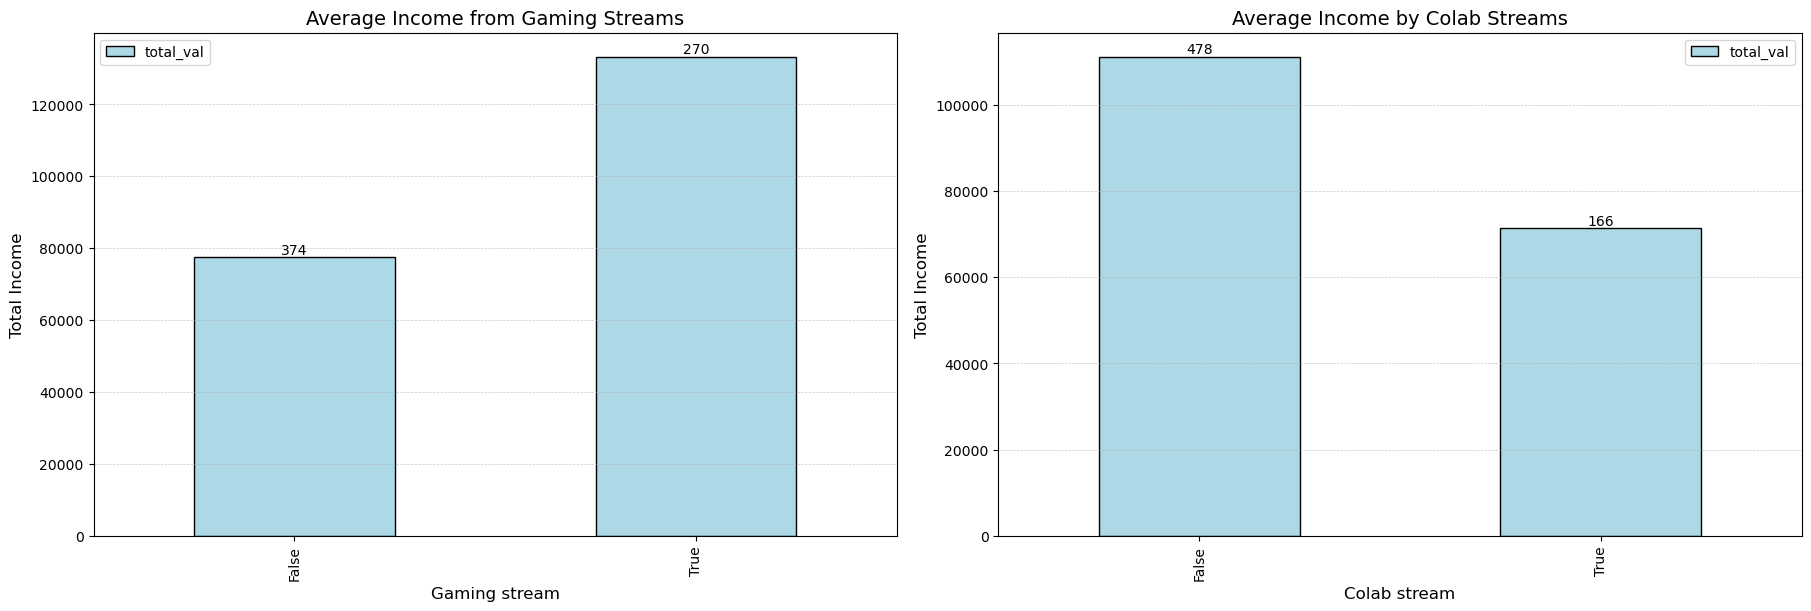

In [41]:
# Define figure and axes
fig, axs = plt.subplots(1, 2, figsize=(18, 6), constrained_layout=True)

# Graph 1: Gaming Streams
df_grouped = df.groupby('is_gaming').agg(
    total_val=('total_val', 'mean'),
    num_streams=('is_gaming', 'size')
).reset_index()

df_grouped = df_grouped.sort_values(by='num_streams', ascending=False)

cmap = colors.LinearSegmentedColormap.from_list("", ["lightblue", "royalblue"])
df_grouped.plot(
    kind='bar',
    x='is_gaming',
    y='total_val',
    colormap=cmap,
    edgecolor='black',
    ax=axs[0]
)

for p, (channel_name, num_streams) in zip(axs[0].patches, df_grouped[['is_gaming', 'num_streams']].values):
    y_value = p.get_height()
    x_value = p.get_x() + p.get_width() / 2
    axs[0].annotate(num_streams, (x_value, y_value), ha='center', va='bottom', fontsize=10)

axs[0].set_title('Average Income from Gaming Streams', fontsize=14)
axs[0].set_xlabel('Gaming stream', fontsize=12)
axs[0].set_ylabel('Total Income', fontsize=12)
axs[0].grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.5)

# Graph 2: Colab Streams
df_grouped = df.groupby('is_colabing').agg(
    total_val=('total_val', 'mean'),
    num_streams=('is_colabing', 'size')
).reset_index()

df_grouped = df_grouped.sort_values(by='num_streams', ascending=False)

df_grouped.plot(
    kind='bar',
    x='is_colabing',
    y='total_val',
    colormap=cmap,
    edgecolor='black',
    ax=axs[1]
)

for p, (channel_name, num_streams) in zip(axs[1].patches, df_grouped[['is_colabing', 'num_streams']].values):
    y_value = p.get_height()
    x_value = p.get_x() + p.get_width() / 2
    axs[1].annotate(num_streams, (x_value, y_value), ha='center', va='bottom', fontsize=10)

axs[1].set_title('Average Income by Colab Streams', fontsize=14)
axs[1].set_xlabel('Colab stream', fontsize=12)
axs[1].set_ylabel('Total Income', fontsize=12)
axs[1].grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.5)

plt.savefig("stream_income_analysis_2.png", dpi=300, format='png')

# Display the graphs
plt.show()


Plotted bar graph grouping by both varibles to see if there is any diagreement from income being directly correlated towards gaming and inversely toward collaborating

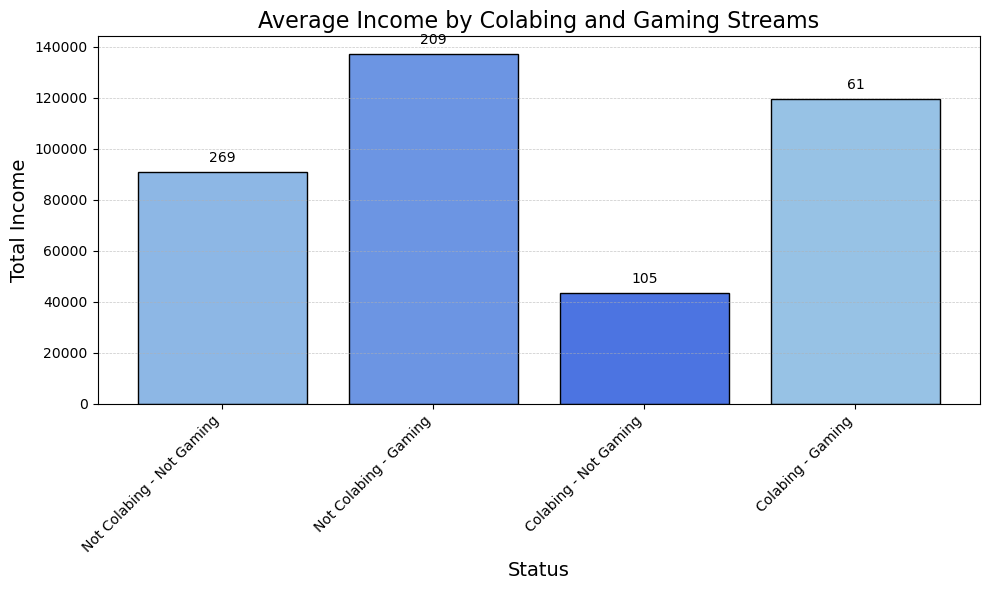

In [44]:

# Ensure that 'num_streams' column is present for annotations
# For example, if we grouped and aggregated, we'll reset the index and check the columns
df_grouped = df.groupby(['is_colabing','is_gaming']).agg(
    total_val=('total_val', 'mean'),
    num_streams=('is_colabing', 'size')
).reset_index()

df_grouped['label'] = df_grouped.apply(
    lambda row: f"{'Colabing' if row['is_colabing'] else 'Not Colabing'} - {'Gaming' if row['is_gaming'] else 'Not Gaming'}",
    axis=1
)


# Create the bar chart
plt.figure(figsize=(10, 6))
cmap = colors.LinearSegmentedColormap.from_list("", ["lightblue", "royalblue"])
bars = plt.bar(df_grouped['label'], df_grouped['total_val'], color=[cmap(0.3), cmap(0.6), cmap(0.9), cmap(0.2)], edgecolor='black')

# Add annotations for num_streams above each bar
for bar, num_streams in zip(bars, df_grouped['num_streams']):
    height = bar.get_height()
    plt.annotate(f"{num_streams}", xy=(bar.get_x() + bar.get_width() / 2, height), 
                 xytext=(0, 5), textcoords="offset points", ha='center', va='bottom')

# Customize plot
plt.title('Average Income by Colabing and Gaming Streams', fontsize=16)
plt.xlabel('Status', fontsize=14)
plt.ylabel('Total Income', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.5)
plt.tight_layout()
plt.savefig("stream_income_analysis_4.png", dpi=300, format='png')

# Display the plot
plt.show()

To check if the cause of the gamig streams earning more was just due to it being longer, but the graphs suggests that the duration of the stream does not really effect the income


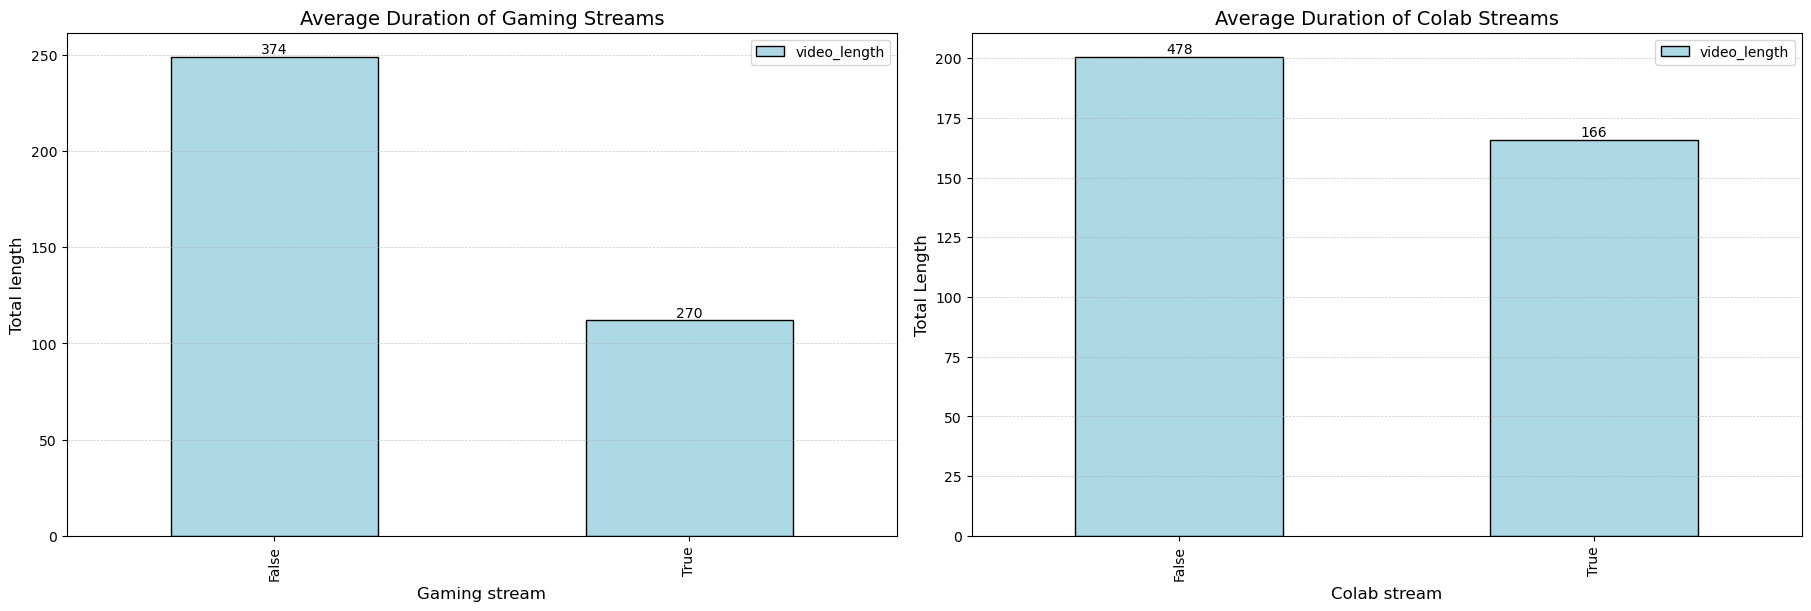

In [47]:
# Define figure and axes
fig, axs = plt.subplots(1, 2, figsize=(18, 6), constrained_layout=True)

# Graph 1: Gaming Streams
df_grouped = df.groupby('is_gaming').agg(
    video_length=('video_length', 'mean'),
    num_streams=('is_gaming', 'size')
).reset_index()

df_grouped = df_grouped.sort_values(by='num_streams', ascending=False)

cmap = colors.LinearSegmentedColormap.from_list("", ["lightblue", "royalblue"])
df_grouped.plot(
    kind='bar',
    x='is_gaming',
    y='video_length',
    colormap=cmap,
    edgecolor='black',
    ax=axs[0]
)

for p, (channel_name, num_streams) in zip(axs[0].patches, df_grouped[['is_gaming', 'num_streams']].values):
    y_value = p.get_height()
    x_value = p.get_x() + p.get_width() / 2
    axs[0].annotate(num_streams, (x_value, y_value), ha='center', va='bottom', fontsize=10)

axs[0].set_title('Average Duration of Gaming Streams', fontsize=14)
axs[0].set_xlabel('Gaming stream', fontsize=12)
axs[0].set_ylabel('Total length', fontsize=12)
axs[0].grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.5)

# Graph 2: Colab Streams
df_grouped = df.groupby('is_colabing').agg(
    video_length=('video_length', 'mean'),
    num_streams=('is_colabing', 'size')
).reset_index()

df_grouped = df_grouped.sort_values(by='num_streams', ascending=False)

df_grouped.plot(
    kind='bar',
    x='is_colabing',
    y='video_length',
    colormap=cmap,
    edgecolor='black',
    ax=axs[1]
)

for p, (channel_name, num_streams) in zip(axs[1].patches, df_grouped[['is_colabing', 'num_streams']].values):
    y_value = p.get_height()
    x_value = p.get_x() + p.get_width() / 2
    axs[1].annotate(num_streams, (x_value, y_value), ha='center', va='bottom', fontsize=10)

axs[1].set_title('Average Duration of Colab Streams', fontsize=14)
axs[1].set_xlabel('Colab stream', fontsize=12)
axs[1].set_ylabel('Total Length', fontsize=12)
axs[1].grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.5)

plt.savefig("stream_income_analysis_2.1.png", dpi=300, format='png')

# Display the graphs
plt.show()


Now i want to add a column that calculates the average donation amount of each superchatter for every video.

In [50]:
df['average_superchat'] = df['val_superchats']/ df['num_superchats']
grouped_df = df.groupby('channel_name')[['val_superchats', 'num_superchats']].sum()  # Use a list for selecting columns
grouped_df['average_superchat_per_channel'] = grouped_df['val_superchats'] / grouped_df['num_superchats']
df = df.merge(grouped_df[['average_superchat_per_channel']], on='channel_name')


I want to determine the day of the week and the hour of the day when the stream occurred, based on the "video_start_time" column.

In [53]:
df['day_of_week_num'] = pd.to_datetime(df['video_start_time']).dt.weekday
df['hour_of_day'] = pd.to_datetime(df['video_start_time']).dt.hour

In [55]:
df.head(3)

,channel_name,channel_id,video_name,video_id,description,published_at,video_start_time,video_end_time,video_length,num_chats,num_superchats,val_superchats,num_memberships,val_memberships,locale,viewcount,tags,game_name,hashtags,ats,tags_count,hashtags_count,ats_count,uptime,total_val,gen,subscribers,is_gaming,is_colabing,average_superchat,average_superchat_per_channel,day_of_week_num,hour_of_day
0,tokino_sora,UCp6993wxpyDPHUpavwDFqgg,【HoloCure】ミニゲームチャレンジするか・・・【ホロライブ/ときのそら】,YC2HA4GIlis,時間ができたから、すっとできるものを！！\n\n\n\n本ゲームはKay Yu様に確認の上配...,2024-12-11T15:23:45Z,2024-12-11T13:02:53Z,2024-12-11T15:13:54Z,131.016667,23,18,25309.672327,5,2450.0,ja,51249,['Video_game_culture'],missing,"['ときのそら生放送', 'ホロライブ']",[],1,2,0,5903.072114,27759.672327,0,1240000,True,False,1406.092907,840.788423,2,13
1,tokino_sora,UCp6993wxpyDPHUpavwDFqgg,【雑談】最近出かけたお話をします。【ホロライブ/ときのそら】,B-DfGRw16xM,最近はいろんなお出かけをしてお休みしつつ配信してました。\nっていう配信をします。\n\n\...,2024-12-10T14:21:57Z,2024-12-10T12:33:39Z,2024-12-10T14:07:50Z,94.183333,60,34,47712.780301,20,9800.0,ja,35519,[],missing,"['ときのそら生放送', 'ホロライブ']",[],1,2,0,7404.872114,57512.780301,0,1240000,True,False,1403.317068,840.788423,1,12
2,tokino_sora,UCp6993wxpyDPHUpavwDFqgg,【ルイージマンション2 HD】ルイージはいつもマンションにいると思ってるわたしの配信【ホロラ...,JfnBh7eVtpQ,え？そうだよね？\n\n\nこの動画およびライブは、任天堂著作物の利用許諾を受けて配信してい...,2024-12-09T14:58:06Z,2024-12-09T11:58:25Z,2024-12-09T14:45:31Z,167.100000,38,19,12920.416843,13,6370.0,ja,44743,"['Role-playing_video_game', 'Video_game_culture']",任天堂 ルイージマンション2 HD,"['ときのそら生放送', 'ホロライブ']",[],2,2,0,8808.722114,19290.416843,0,1240000,False,False,680.021939,840.788423,0,11


As I am confident about the linearity of the variable relationships, I used spearman correlation instead of pearson correlation.

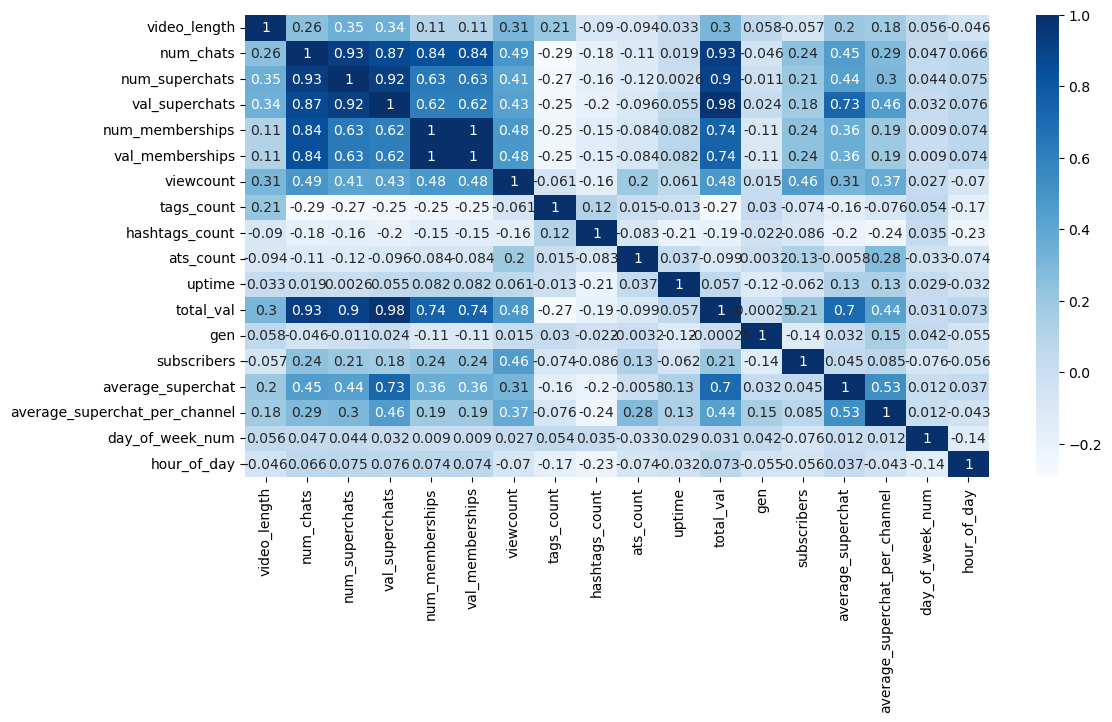

In [58]:
numeric_cols = df.select_dtypes(include=[np.number])  # Selects numeric columns
# 4. Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_cols.corr('spearman'), annot=True, cmap='Blues')
plt.savefig("spearman.png", dpi=300, format='png')

plt.show()

Here we can which streamers have the highest spending chatters, now ordered by the average superchat donation amount per donation. This ordering provides a clearer picture of their relationship. Murasaki shion and sakamata chloe as the wealthiest viewers, this is suspicious because their viewer base is close knit. They interact very of on X(Twitter).

<Figure size 1200x600 with 0 Axes>

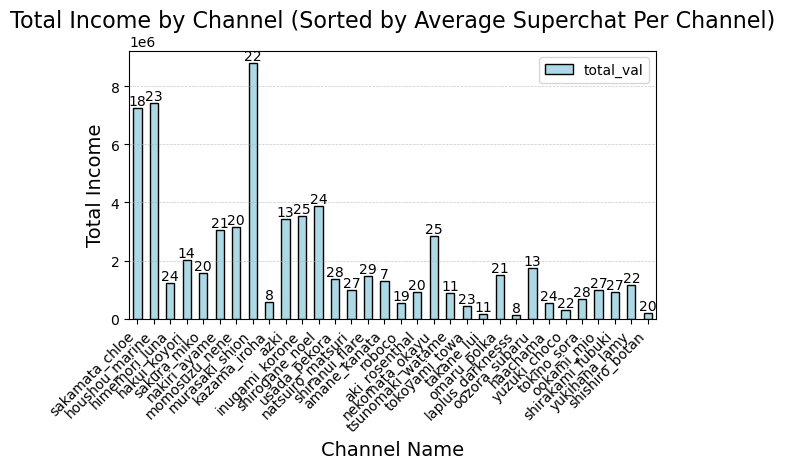

In [61]:
# Sort the dataframe by the 'average_superchat_per_channel' column
sorted_channels = df.sort_values(by='average_superchat_per_channel', ascending=False)
# Get the unique channel names in the sorted order
sorted_channels_unique = sorted_channels['channel_name'].unique()

# 1. Group by 'channel_name' to calculate total_val and number of streams
df_grouped = df.groupby('channel_name').agg(
    total_val=('total_val', 'sum'),
    num_streams=('channel_name', 'size')
).reset_index()

# 2. Ensure the order matches the unique_channels variable
df_grouped['channel_name'] = pd.Categorical(df_grouped['channel_name'], categories=sorted_channels_unique, ordered=True)
df_grouped = df_grouped.sort_values(by='channel_name')

# 3. Create the bar chart with annotations
plt.figure(figsize=(12, 6))
cmap = colors.LinearSegmentedColormap.from_list("", ["lightblue", "royalblue"])
ax = df_grouped.plot(kind='bar', x='channel_name', y='total_val', colormap=cmap, edgecolor='black')

# Add text annotations above each bar
for p, (channel_name, num_streams) in zip(ax.patches, df_grouped[['channel_name', 'num_streams']].values):
    y_value = p.get_height()
    x_value = p.get_x() + p.get_width() / 2
    ax.annotate(num_streams, (x_value, y_value), ha='center', va='bottom', fontsize=10)

plt.title('Total Income by Channel (Sorted by Average Superchat Per Channel)', fontsize=16)
plt.xlabel('Channel Name', fontsize=14)
plt.ylabel('Total Income', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.5)
plt.tight_layout()
plt.savefig("chatter_wealth.png", dpi=300, format='png')

plt.show()


The lower generations indicate the seniority of the vtubers. Here we can see that seniority of the vtubers are not linearly connected to their income through livestreaming.

<Figure size 1200x600 with 0 Axes>

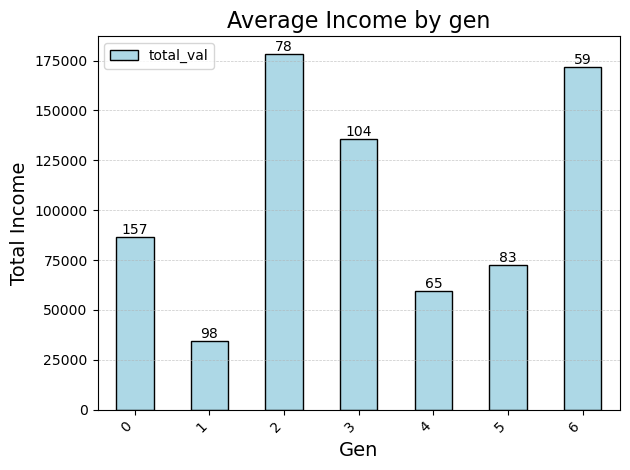

In [29]:
df_grouped = df.groupby('gen')['total_val'].mean().reset_index()

# 2. Calculate number of streams per channel (if not already done)
group_counts = df.groupby('gen').size()

# 3. Create the bar chart with annotations
plt.figure(figsize=(12, 6))
cmap = colors.LinearSegmentedColormap.from_list("", ["lightblue", "royalblue"])
ax = df_grouped.plot(kind='bar', x='gen', y='total_val', colormap=cmap, edgecolor='black')

for p, label in zip(ax.patches, ax.get_xticklabels()):
    y_value = p.get_height()
    x_value = p.get_x() + p.get_width() / 2
    gen = label.get_text()  # Assuming label.get_text() gives the actual gender value
    num_streams = group_counts[int(x_value)]  # Access by index (assuming index corresponds to bars)
    label = num_streams
    ax.annotate(label, (x_value, y_value), ha='center', va='bottom', fontsize=10)

plt.title('Average Income by gen', fontsize=16)
plt.xlabel('Gen', fontsize=14)
plt.ylabel('Total Income', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.5)
plt.tight_layout()
plt.savefig("Income_gen.png", dpi=300, format='png')

plt.show()

Here we can see that it is best to stream on thursdays and fridays

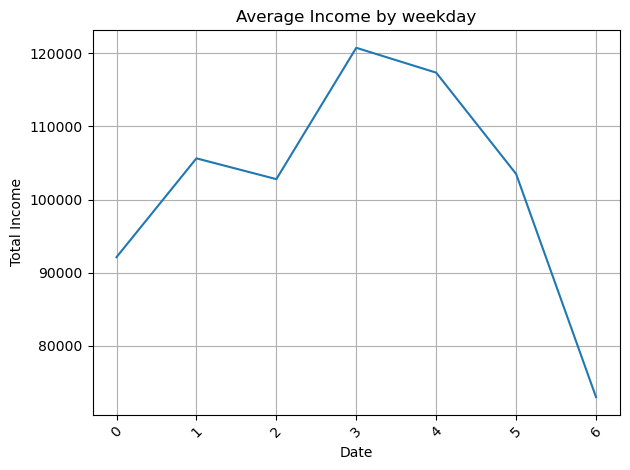

In [31]:
# Group by day of the week and calculate the total value for each day
df_grouped = df.groupby('day_of_week_num')['total_val'].mean().reset_index()

plt.plot(df_grouped['day_of_week_num'], df_grouped['total_val'])


# Customize the plot
plt.title('Average Income by weekday')
plt.xlabel('Date')
plt.ylabel('Total Income')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig("Income by weekday.png", dpi=300, format='png')

plt.show()

Here, we can assume that there are two groups of viewers who donate either late at night or during the afternoon. Vtubers should consider avoiding streaming after work hours and early in the morning.

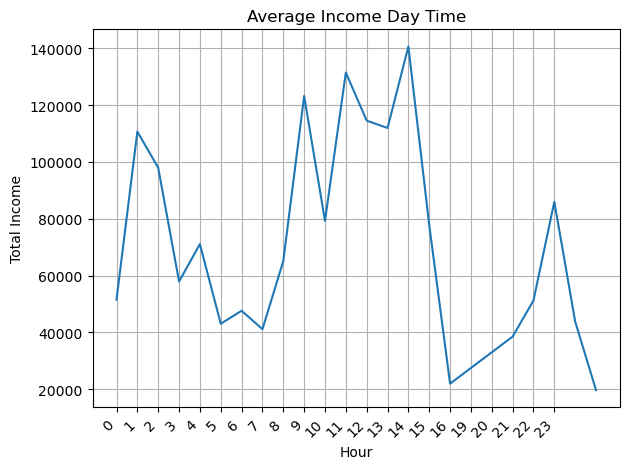

In [46]:
# Group by day of the week and calculate the total value for each day
df_grouped = df.groupby('hour_of_day')['total_val'].mean().reset_index()

plt.plot(df_grouped['hour_of_day'], df_grouped['total_val'])


# Customize the plot
plt.title('Average Income Day Time')
plt.xlabel('Hour')
plt.ylabel('Total Income')
plt.xticks(np.arange(len(df_grouped)), df_grouped['hour_of_day'], rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.savefig("Income_by)time.png", dpi=300, format='png')

plt.show()

The number of viewer spiked throughout the night meaning that the income rise was due to amount of viewer not individual high spending viewer. However, but for work hours there seem to be high spending viewers available

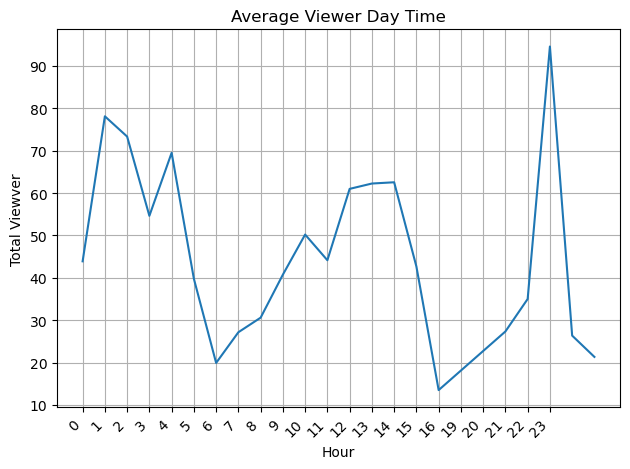

In [48]:
# Group by day of the week and calculate the total value for each day
df_grouped = df.groupby('hour_of_day')['num_superchats'].mean().reset_index()

plt.plot(df_grouped['hour_of_day'], df_grouped['num_superchats'])


# Customize the plot
plt.title('Average Viewer Day Time')
plt.xlabel('Hour')
plt.ylabel('Total Viewver')
plt.xticks(np.arange(len(df_grouped)), df_grouped['hour_of_day'], rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.savefig("Viewer_time.png", dpi=300, format='png')

plt.show()

To be successful as a corporate streamer, it is crucial not only to cultivate a large and engaged audience but also to attract wealthy chatters. Based on the violin plot quartile values, I will add a new feature that indicates the wealth level of the average chatter,wealthy if its over 2500 if not they are not wealthy. Why 2500 , because we can see clear cutoff from violin plot body.

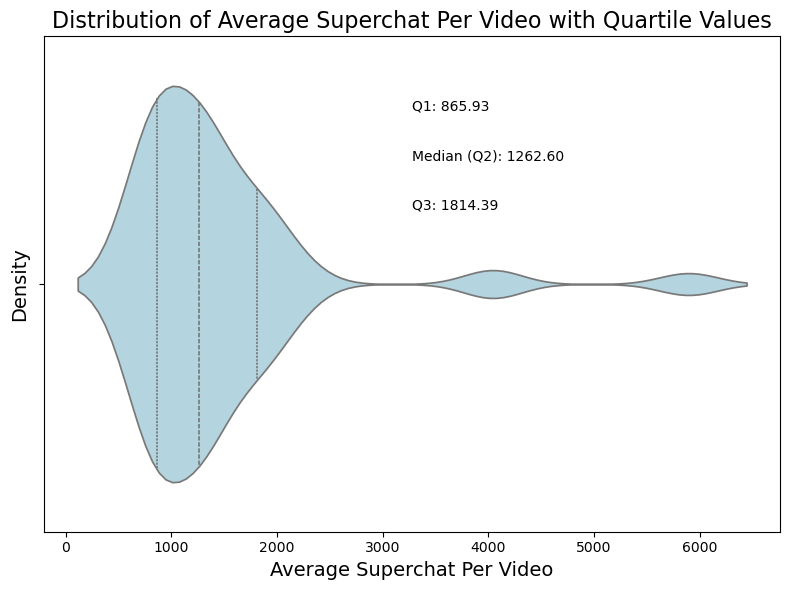

In [50]:
# Assuming df is your dataframe and it already contains 'average_superchat_per_channel'
# 1. Group by 'channel_name' to calculate total_val and number of streams
df_grouped = df.groupby('channel_name').agg(
    total_val=('total_val', 'sum'),
    num_streams=('channel_name', 'size')
).reset_index()

# 2. Get the mean of 'average_superchat_per_channel' for each channel
average_superchat_per_channel = df.groupby('channel_name')['average_superchat_per_channel'].mean()

# 4. Create the violin plot for 'average_superchat_per_channel' with quartile values
plt.figure(figsize=(8, 6))
sns.violinplot(x=df['average_superchat_per_channel'], color='lightblue', inner='quart')
plt.title('Distribution of Average Superchat Per Video with Quartile Values', fontsize=16)
plt.xlabel('Average Superchat Per Video', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Show quartile values on the plot
q1 = df['average_superchat_per_channel'].quantile(0.25)
q2 = df['average_superchat_per_channel'].quantile(0.5)
q3 = df['average_superchat_per_channel'].quantile(0.75)
plt.text(0.5, 0.85, f'Q1: {q1:.2f}', fontsize=10, transform=plt.gca().transAxes, color='black')
plt.text(0.5, 0.75, f'Median (Q2): {q2:.2f}', fontsize=10, transform=plt.gca().transAxes, color='black')
plt.text(0.5, 0.65, f'Q3: {q3:.2f}', fontsize=10, transform=plt.gca().transAxes, color='black')

plt.tight_layout()
plt.savefig("Violin_wealth.png", dpi=300, format='png')
plt.show()



In [52]:
# Adding a new column 'chatter_wealth' based on the quartile values
# Define a function to assign wealth based on median and threshold
def assign_wealth(row):
    if row['average_superchat'] <= 2500:
        return 0
    else:
        return 1
df['chatter_wealth'] = df.apply(assign_wealth, axis=1)

In [53]:
df.drop(columns=['channel_id', 'video_name', 'video_id', 'description', 'published_at', 'video_start_time','video_end_time', 'num_chats', 'num_superchats', 'num_memberships', 'val_superchats', 'val_memberships', 'viewcount', 'uptime', 'total_val', 'average_superchat', 'average_superchat_per_channel' ], inplace=True)


Dropping the collumns directly calculated the wealthy chatter and any unnecessary variables not concerning activities and behavior of the vtuber

In [58]:
df.dtypes

channel_name        object
video_length       float64
locale              object
tags                object
game_name           object
hashtags            object
ats                 object
tags_count           int64
hashtags_count       int64
ats_count            int64
gen                  int64
subscribers          int64
is_gaming             bool
is_colabing           bool
day_of_week_num      int32
hour_of_day          int32
chatter_wealth       int64
dtype: object

The generation of the vtuber seem to be most contributing factor to wealth. This must be due to the clear indication of wealthy viwer from the gen 6

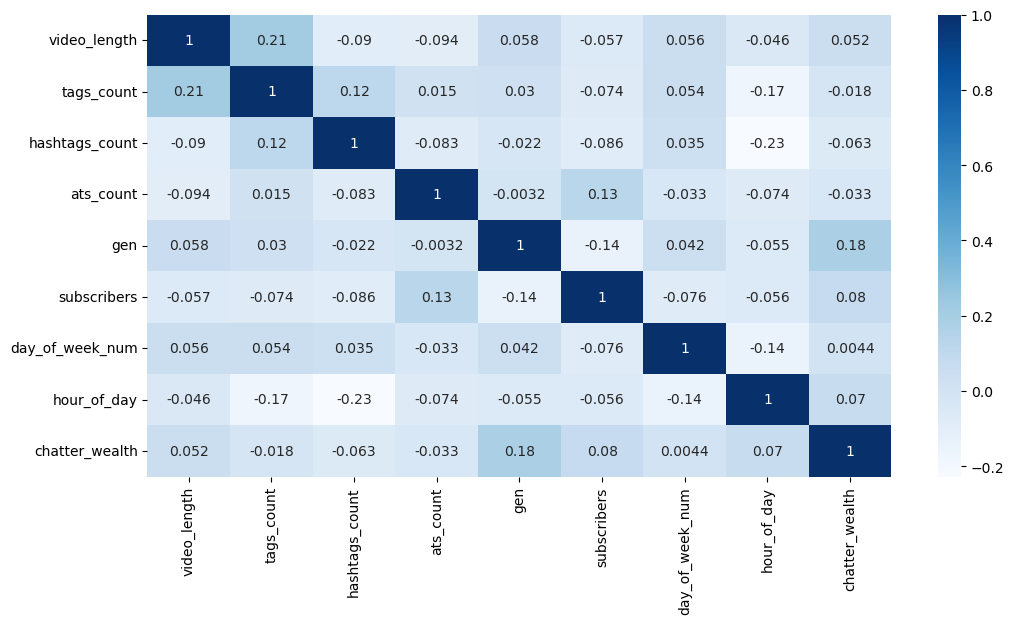

In [63]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.select_dtypes(include=[np.number]) .corr('spearman'), annot=True, cmap='Blues')
plt.show()

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   channel_name     644 non-null    object 
 1   video_length     644 non-null    float64
 2   locale           644 non-null    object 
 3   tags             644 non-null    object 
 4   game_name        644 non-null    object 
 5   hashtags         644 non-null    object 
 6   ats              644 non-null    object 
 7   tags_count       644 non-null    int64  
 8   hashtags_count   644 non-null    int64  
 9   ats_count        644 non-null    int64  
 10  gen              644 non-null    int64  
 11  subscribers      644 non-null    int64  
 12  is_gaming        644 non-null    bool   
 13  is_colabing      644 non-null    bool   
 14  day_of_week_num  644 non-null    int32  
 15  hour_of_day      644 non-null    int32  
 16  chatter_wealth   644 non-null    int64  
dtypes: bool(2), floa

Checking class imbalnce of the target variable

Value counts for chatter_wealth:
 chatter_wealth
0    597
1     47
Name: count, dtype: int64


C:\Users\Dell\AppData\Local\Temp\ipykernel_17560\2184078092.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='chatter_wealth', palette='viridis')


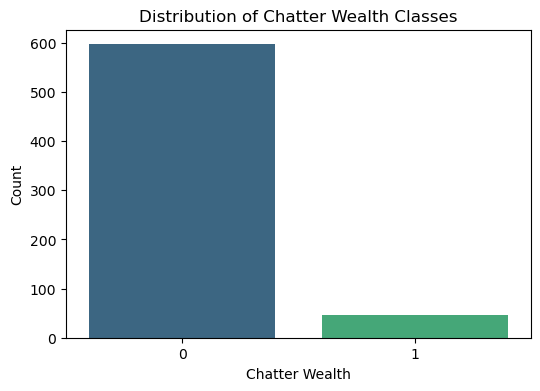


Percentages of each class:
 chatter_wealth
0    92.701863
1     7.298137
Name: proportion, dtype: float64


In [77]:
# Check the value counts of the 'chatter_wealth' column
value_counts = df['chatter_wealth'].value_counts()
print("Value counts for chatter_wealth:\n", value_counts)

# Plotting the class distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='chatter_wealth', palette='viridis')
plt.title('Distribution of Chatter Wealth Classes')
plt.xlabel('Chatter Wealth')
plt.ylabel('Count')
plt.savefig("Imbalance_plot.png", dpi=300, format='png')

plt.show()

# Calculate and display the percentages of the classes
percentages = df['chatter_wealth'].value_counts(normalize=True) * 100
print("\nPercentages of each class:\n", percentages)

Separating dataset into 3 categories processing each one of them seperately appropriately. One hot encoding was used for textual as well as the categorical. Because the same one i tried to use on categorical was not working on textual features i used the pd.dummies as the equivalent.
BEcause i am trying to predict the imbalanced outlier class robustscaler is the best option because it does not treat the outlier differently, meaning we will still retain the clear separation between the two classes after scaling.

In [79]:
# Convert boolean columns to numeric (True -> 1, False -> 0)
df['is_gaming'] = df['is_gaming'].astype(int)
df['is_colabing'] = df['is_colabing'].astype(int)

numerical_features = ['tags_count', 'hashtags_count', 'ats_count', 'subscribers', 
                             'day_of_week_num', 'hour_of_day', 'is_gaming', 'is_colabing']
categorical_features = ['channel_name','locale','gen']
text_features = ['tags', 'game_name', 'hashtags', 'ats']

def apply_dummies(df, columns):
    for column in columns:
         # Correctly flatten the lists and create dummy variables
        # handles list types
        dummies = pd.get_dummies(df[column].apply(lambda x: " ".join(i.strip() for i in x.strip("[]").replace("'","").split(",")) if isinstance(x, str) else "" ), prefix = column, prefix_sep='_')
        df = pd.concat([df, dummies], axis=1)
    return df

# Apply pd.get_dummies to the 'text' features
df = apply_dummies(df, text_features)


In [81]:
# Define preprocessing pipelines for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([('imputer', SimpleImputer(strategy='mean')), ('scaler', RobustScaler())]), numerical_features),
        ('cat', Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                          ('onehot', OneHotEncoder(handle_unknown='ignore'))]), categorical_features),
        ],
    remainder='drop'
)

# Split data into features and target, explicitly dropping text columns from X
X = df.drop(['chatter_wealth'] + text_features, axis=1)
y = df['chatter_wealth']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=605)

# Apply the preprocessing steps to the training and testing data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

As the boudaries between the imbalanced target features is clear, as defined by me. Used the normal SMOTE for generating synthetic minory class, instead of ADASYN and SMOTENN. Also SMOTE is simple is faster

Used grid searc to find the best parameters for smote sampling and random forest classifier. As expected it performed worse on the minority class. Also, from the feature importance, we can see that our expected features playing a impactful roles in the prediction. Like the Strategey game and @ symbols being important

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best SMOTE Parameters: {'sampling_strategy': 'minority', 'k_neighbors': 3}
Best Random Forest Parameters: {'max_depth': 10, 'n_estimators': 150}
Best Random Forest Test Accuracy: 0.9302

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       120
           1       0.50      0.44      0.47         9

    accuracy                           0.93       129
   macro avg       0.73      0.71      0.72       129
weighted avg       0.93      0.93      0.93       129



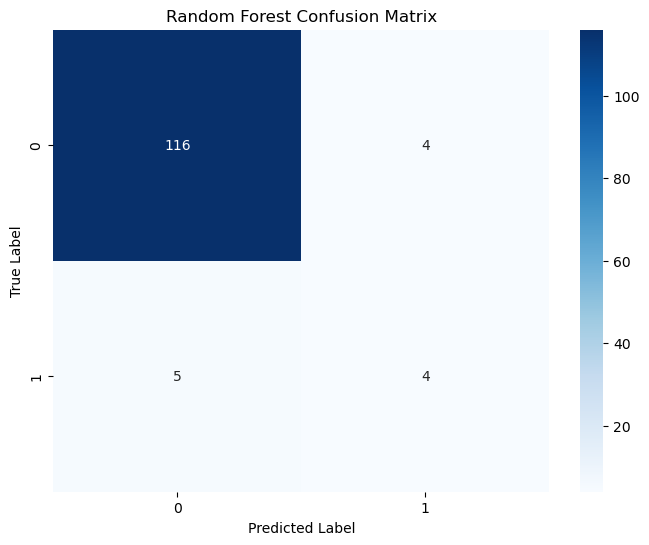

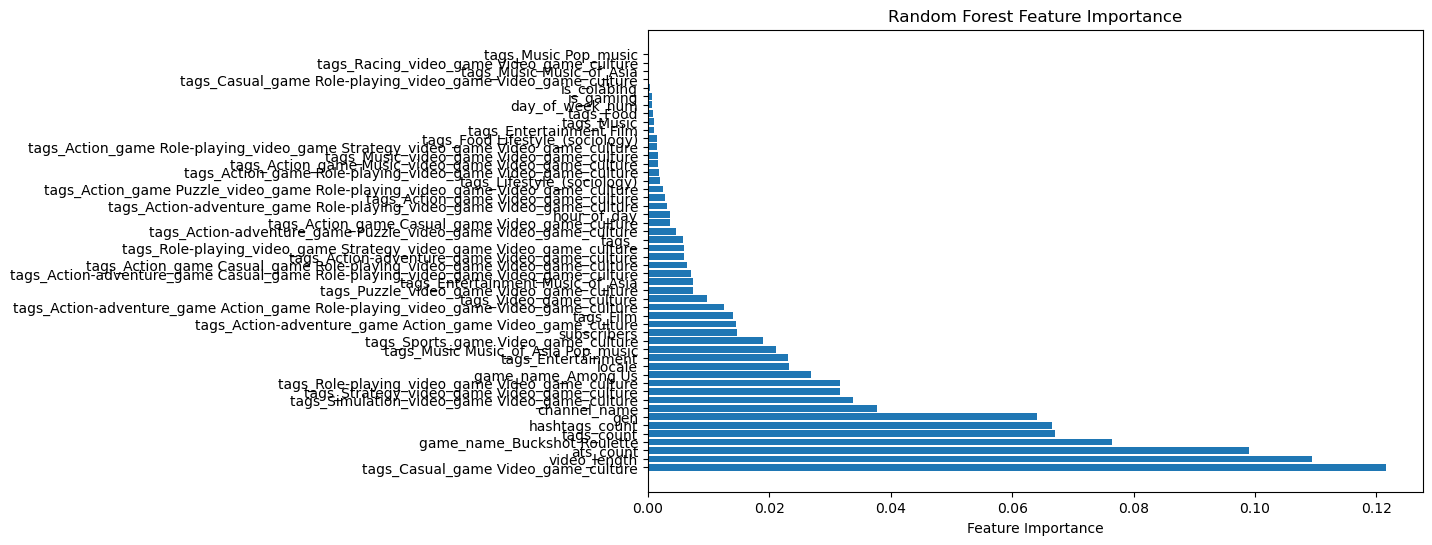

In [84]:
# Set up the possible SMOTE parameters to test
smote_param_grid = {
    'sampling_strategy': ['minority', 'all'],
    'k_neighbors': [3, 5, 7]  # Corrected parameter name for SMOTE
}

# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(random_state=605)

# Placeholder for storing the best model
best_rf_model = None
best_smote_params = None
best_accuracy = 0
best_rf_params = None

# Loop through the possible SMOTE parameters
for sampling_strategy in smote_param_grid['sampling_strategy']:
    for k_neighbors in smote_param_grid['k_neighbors']:
        
        # Initialize SMOTE with the current parameters
        smote = SMOTE(sampling_strategy=sampling_strategy, k_neighbors=k_neighbors, random_state=605)
        
        # Resample the training data with SMOTE
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train)
        
        # Set up the GridSearchCV for RandomForest hyperparameters
        param_grid_rf = {
            'n_estimators': [50, 100, 150],
            'max_depth': [10, 20, 30]
        }
        
        # Perform Grid Search on Random Forest
        grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
        grid_search_rf.fit(X_train_resampled, y_train_resampled)
        
        # Get the best Random Forest model from the grid search
        rf_model_best = grid_search_rf.best_estimator_
        
        # Capture the best Random Forest parameters
        rf_model_best_params = grid_search_rf.best_params_
        
        # Make predictions on the test data
        y_pred_rf = rf_model_best.predict(X_test_transformed)
        
        # Evaluate the model
        accuracy_rf = accuracy_score(y_test, y_pred_rf)
        
        # Update the best model if the accuracy is better
        if accuracy_rf > best_accuracy:
            best_accuracy = accuracy_rf
            best_rf_model = rf_model_best
            best_smote_params = {'sampling_strategy': sampling_strategy, 'k_neighbors': k_neighbors}
            best_rf_params = rf_model_best_params

# Print the results
print(f"Best SMOTE Parameters: {best_smote_params}")
print(f"Best Random Forest Parameters: {best_rf_params}")
print(f"Best Random Forest Test Accuracy: {best_accuracy:.4f}")

# Generate classification report
print("\nRandom Forest Classification Report:\n", classification_report(y_test, best_rf_model.predict(X_test_transformed)))

# Generate confusion matrix
cm_rf = confusion_matrix(y_test, best_rf_model.predict(X_test_transformed))

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Feature importance plotting
rf_feature_importance = rf_model_best.feature_importances_
# Sort the feature importance and get the indices of the top features
sorted_idx = np.argsort(rf_feature_importance)[::-1]

# Get the top 50 important features (or any number you prefer)
top_n = 50
top_idx = sorted_idx[:top_n]
top_features = X_train.columns[top_idx]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(np.arange(top_n), rf_feature_importance[top_idx])
plt.yticks(np.arange(top_n), top_features)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.savefig("Top_features.png", dpi=300, format='png')

plt.show()


Compared to bagging models like bagging models, boosting models are bad at handlin smaller dataset. Still, they are designde to handle imbalanced classes so I am expecting similar result to random forest

Similar result to random forest but still significantly worse performance

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Random Forest Parameters: {'max_depth': 3, 'n_estimators': 50}
Best Random Forest Test Accuracy: 0.9302

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       120
           1       0.38      0.33      0.35         9

    accuracy                           0.91       129
   macro avg       0.66      0.65      0.65       129
weighted avg       0.91      0.91      0.91       129



E:\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:41:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


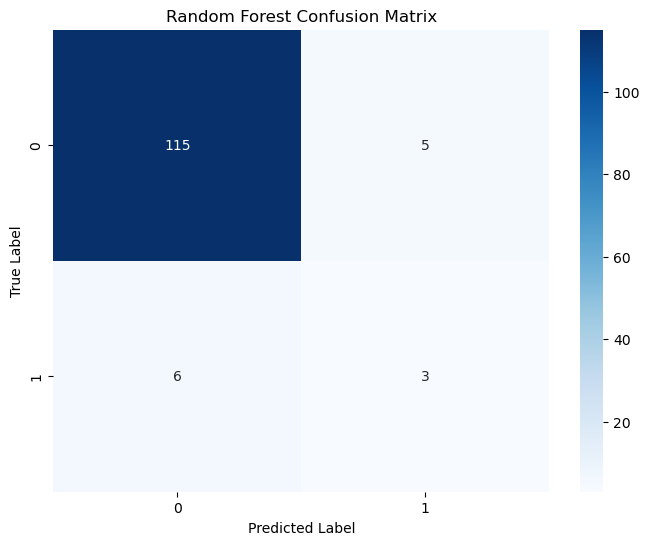

In [102]:
from xgboost import XGBClassifier

# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=605, use_label_encoder=False)
# Initialize SMOTE with specific parameters
smote = SMOTE(sampling_strategy='minority', k_neighbors=3, random_state=605)

# Resample the training data with SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train)


# Set up the GridSearchCV for RandomForest hyperparameters
param_grid_xgb = {
            'n_estimators': [50, 100, 150],
            'max_depth': [3, 6, 10]
        }

# Perform Grid Search on Random Forest
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train_resampled, y_train_resampled)

# Get the best Random Forest model from the grid search
xgb_model_best = grid_search_xgb.best_estimator_

# Capture the best Random Forest parameters
xgb_model_best_params = grid_search_xgb.best_params_

# Make predictions on the test data
y_pred_xgb = xgb_model_best.predict(X_test_transformed)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Print the results
print(f"Best Random Forest Parameters: {xgb_model_best_params}")
print(f"Best Random Forest Test Accuracy: {accuracy_rf:.4f}")

# Generate classification report
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_xgb))

# Generate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_xgb)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix')
plt.show()


The gaussian NB was showing error concerning handling array so used the top code. TBH I though i should include at least one NB model so here it is. AS expected the worst performance

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best GaussianNB Parameters: {'var_smoothing': 1e-09}
Best GaussianNB Test Accuracy: 0.5814

GaussianNB Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.57      0.72       120
           1       0.12      0.78      0.21         9

    accuracy                           0.58       129
   macro avg       0.55      0.67      0.46       129
weighted avg       0.91      0.58      0.68       129



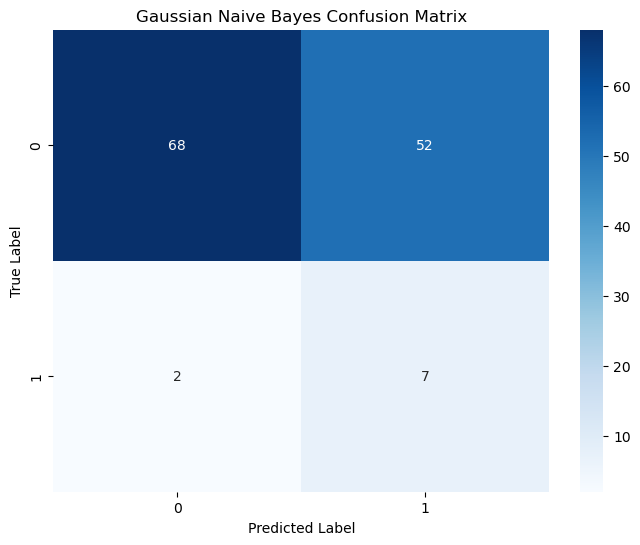

In [106]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Convert the sparse matrix to dense format (if needed)
X_train_dense = X_train_transformed.toarray() if hasattr(X_train_transformed, 'toarray') else X_train_transformed
X_test_dense = X_test_transformed.toarray() if hasattr(X_test_transformed, 'toarray') else X_test_transformed

# Now fit the model using the dense matrices
grid_search_gnb.fit(X_train_dense, y_train)

# Get the best Gaussian Naive Bayes model from the grid search
gnb_model_best = grid_search_gnb.best_estimator_

# Capture the best Gaussian Naive Bayes parameters
gnb_model_best_params = grid_search_gnb.best_params_

# Make predictions on the test data
y_pred_gnb = gnb_model_best.predict(X_test_dense)

# Evaluate the model
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)

# Print the results
print(f"Best GaussianNB Parameters: {gnb_model_best_params}")
print(f"Best GaussianNB Test Accuracy: {accuracy_gnb:.4f}")

# Generate classification report
print("\nGaussianNB Classification Report:\n", classification_report(y_test, y_pred_gnb))

# Generate confusion matrix
cm_gnb = confusion_matrix(y_test, y_pred_gnb)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gnb, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Gaussian Naive Bayes Confusion Matrix')
plt.show()


I thought the MLP would perform good if it was not overfit. AS we can see with 0.33 recall it is clearly not overfit. HOWever, very unexpected to get this bad result from it. Also, had to label encode the target value to be used for the MLP.

In [120]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have X_train_transformed and X_test_transformed as the transformed feature sets
# And y_train as the target labels

# 1. Encode the target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# 2. Convert sparse matrices to dense if necessary
X_train_dense = X_train_transformed.toarray() if hasattr(X_train_transformed, 'toarray') else X_train_transformed
X_test_dense = X_test_transformed.toarray() if hasattr(X_test_transformed, 'toarray') else X_test_transformed

# 3. Define the MLP model and hyperparameter grid
mlp_model = MLPClassifier(max_iter=1000)

param_grid = {
    'hidden_layer_sizes': [(100,)],  # Set to only one hidden layer of 100 nodes
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
}

# 4. Set up GridSearchCV
grid_search_mlp = GridSearchCV(estimator=mlp_model, param_grid=param_grid, cv=5)

# 5. Fit the grid search to the training data
grid_search_mlp.fit(X_train_dense, y_train_encoded)

# 6. Get the best model
best_mlp = grid_search_mlp.best_estimator_

# 7. Evaluate the best model
best_score = best_mlp.score(X_test_dense, y_test_encoded)
print("Best Model Accuracy:", best_score)

# 8. Generate classification report and confusion matrix
y_pred = best_mlp.predict(X_test_dense)

print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred))


Best Model Accuracy: 0.9224806201550387

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       120
           1       0.43      0.33      0.38         9

    accuracy                           0.92       129
   macro avg       0.69      0.65      0.67       129
weighted avg       0.91      0.92      0.92       129


Confusion Matrix:
 [[116   4]
 [  6   3]]


E:\anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


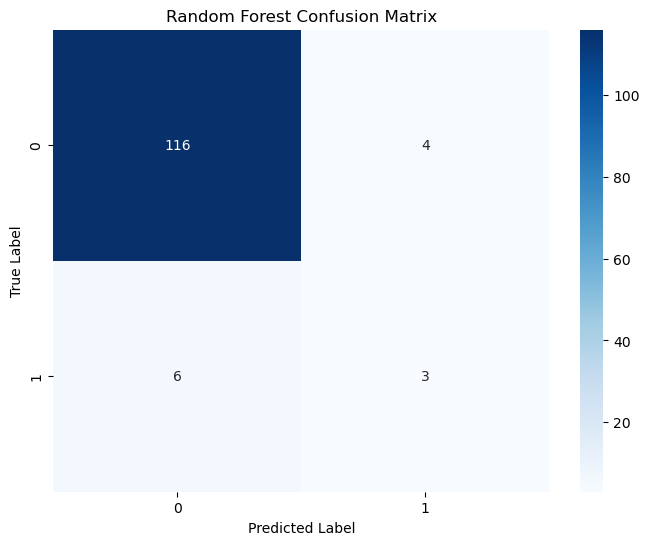

In [126]:
cm_rf = confusion_matrix(y_test_encoded, y_pred)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix')
plt.show()

In conclusion random forest ensemble model performed the best on the task, and the variable I though would effect the prediction although with not concrete proof was effecting it a bit. Overall decent results considereing I collected the data myself.